In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [26]:
df=pd.read_csv("final_dataset.csv")

In [27]:
financial=df[['Number of employees',
       'Shreholder funds', 'Total assets', 'Long term liabilities', 'Turnover',
       'EBIT margin', 'Net income', 'Liquidity ratio',
       'Profit (Loss) before Taxation', 'diff','Company status']]

In [28]:
financial[financial['Company status']==1].describe()

,Number of employees,Shreholder funds,Total assets,Long term liabilities,Turnover,EBIT margin,Net income,Liquidity ratio,Profit (Loss) before Taxation,diff,Company status
count,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.0
mean,30.074901,246.602091,2970.803546,-806.542137,4743.494029,2.043338,237.942648,2.850508,259.698988,495.122536,1.0
std,56.778099,6577.776206,17352.271159,8739.367919,5904.456185,14.613432,4863.110801,7.666475,4874.853699,327.005681,0.0
min,-51.000000,-169957.000000,-17.268364,-382942.000000,-126509.682520,-138.591847,-141444.000000,-3.135229,-141509.000000,-9891.000000,1.0
25%,8.000000,-23.000000,71.000000,-189.500000,1296.503740,-5.269308,296.549842,0.470000,253.176863,366.000000,1.0
50%,21.000000,13.500000,351.500000,-4.000000,4147.413905,1.462720,302.550507,0.990000,311.103523,501.500000,1.0
75%,38.000000,280.000000,1481.500000,-0.809554,7276.646810,8.772693,307.260788,2.160000,370.273535,663.000000,1.0
max,2394.000000,35575.000000,556001.000000,2249.000000,80013.761591,100.000000,193492.000000,99.520000,193492.000000,1080.000000,1.0


In [29]:
financial[financial['Company status']==0].describe()

,Number of employees,Shreholder funds,Total assets,Long term liabilities,Turnover,EBIT margin,Net income,Liquidity ratio,Profit (Loss) before Taxation,diff,Company status
count,26956.000000,2.695600e+04,2.695600e+04,2.695600e+04,2.695600e+04,26956.000000,2.695600e+04,26956.000000,2.695600e+04,26956.000000,26956.0
mean,53.385554,2.900235e+03,8.746462e+03,-1.862529e+03,7.337247e+03,5.303144,3.134362e+02,4.817330,3.647207e+02,301.844747,0.0
std,67.439022,1.722821e+04,3.899736e+04,1.701063e+04,1.773106e+04,21.387787,1.270670e+04,9.486420,1.273463e+04,116.364910,0.0
min,-81.000000,-2.761620e+05,-2.859421e+01,-1.035457e+06,1.000000e+01,-249.289067,-2.286810e+05,-46.145557,-2.286810e+05,-119.000000,0.0
25%,11.000000,1.330000e+02,5.400000e+02,-3.890000e+02,5.900000e+02,-2.050000,-2.500000e+01,1.027500,-2.600000e+01,281.000000,0.0
50%,33.000000,9.850000e+02,3.092000e+03,-5.000000e+00,2.717000e+03,3.910000,5.600000e+01,1.860000,5.900000e+01,281.000000,0.0
75%,76.000000,3.995250e+03,9.166250e+03,-5.614602e-01,1.165525e+04,12.200000,4.510000e+02,4.270000,5.120000e+02,371.000000,0.0
max,4906.000000,2.542900e+06,3.069662e+06,9.264000e+03,2.005067e+06,175.507143,2.002825e+06,99.570000,2.002825e+06,1011.000000,0.0


Several fiancnial features related to a healthy company performance are significant higher on the healthy companies group
Shreholders funds, Total asstes Number of employess, Turnover, Net inocme etc.

Appplying Mann-Whitney test to investigate the statistical significance between the differences on the financial features among the two groups

In [30]:
# Mann-Whitney U test
def man_test(data1,data2):
    stat, p = mannwhitneyu(data1, data2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
for i in financial:
    print(i)
    man_test(df[df['Company status']==0][i],df[df['Company status']==1][i])
    print()
    print('##################################')

Number of employees
Statistics=31111303.500, p=0.000
Different distribution (reject H0)

##################################
Shreholder funds
Statistics=19676555.500, p=0.000
Different distribution (reject H0)

##################################
Total assets
Statistics=21214202.500, p=0.000
Different distribution (reject H0)

##################################
Long term liabilities
Statistics=40993651.500, p=0.471
Same distribution (fail to reject H0)

##################################
Turnover
Statistics=40047380.000, p=0.015
Different distribution (reject H0)

##################################
EBIT margin
Statistics=35272594.000, p=0.000
Different distribution (reject H0)

##################################
Net income
Statistics=30327779.000, p=0.000
Different distribution (reject H0)

##################################
Liquidity ratio
Statistics=27213680.000, p=0.000
Different distribution (reject H0)

##################################
Profit (Loss) before Taxation
Statistics=3069

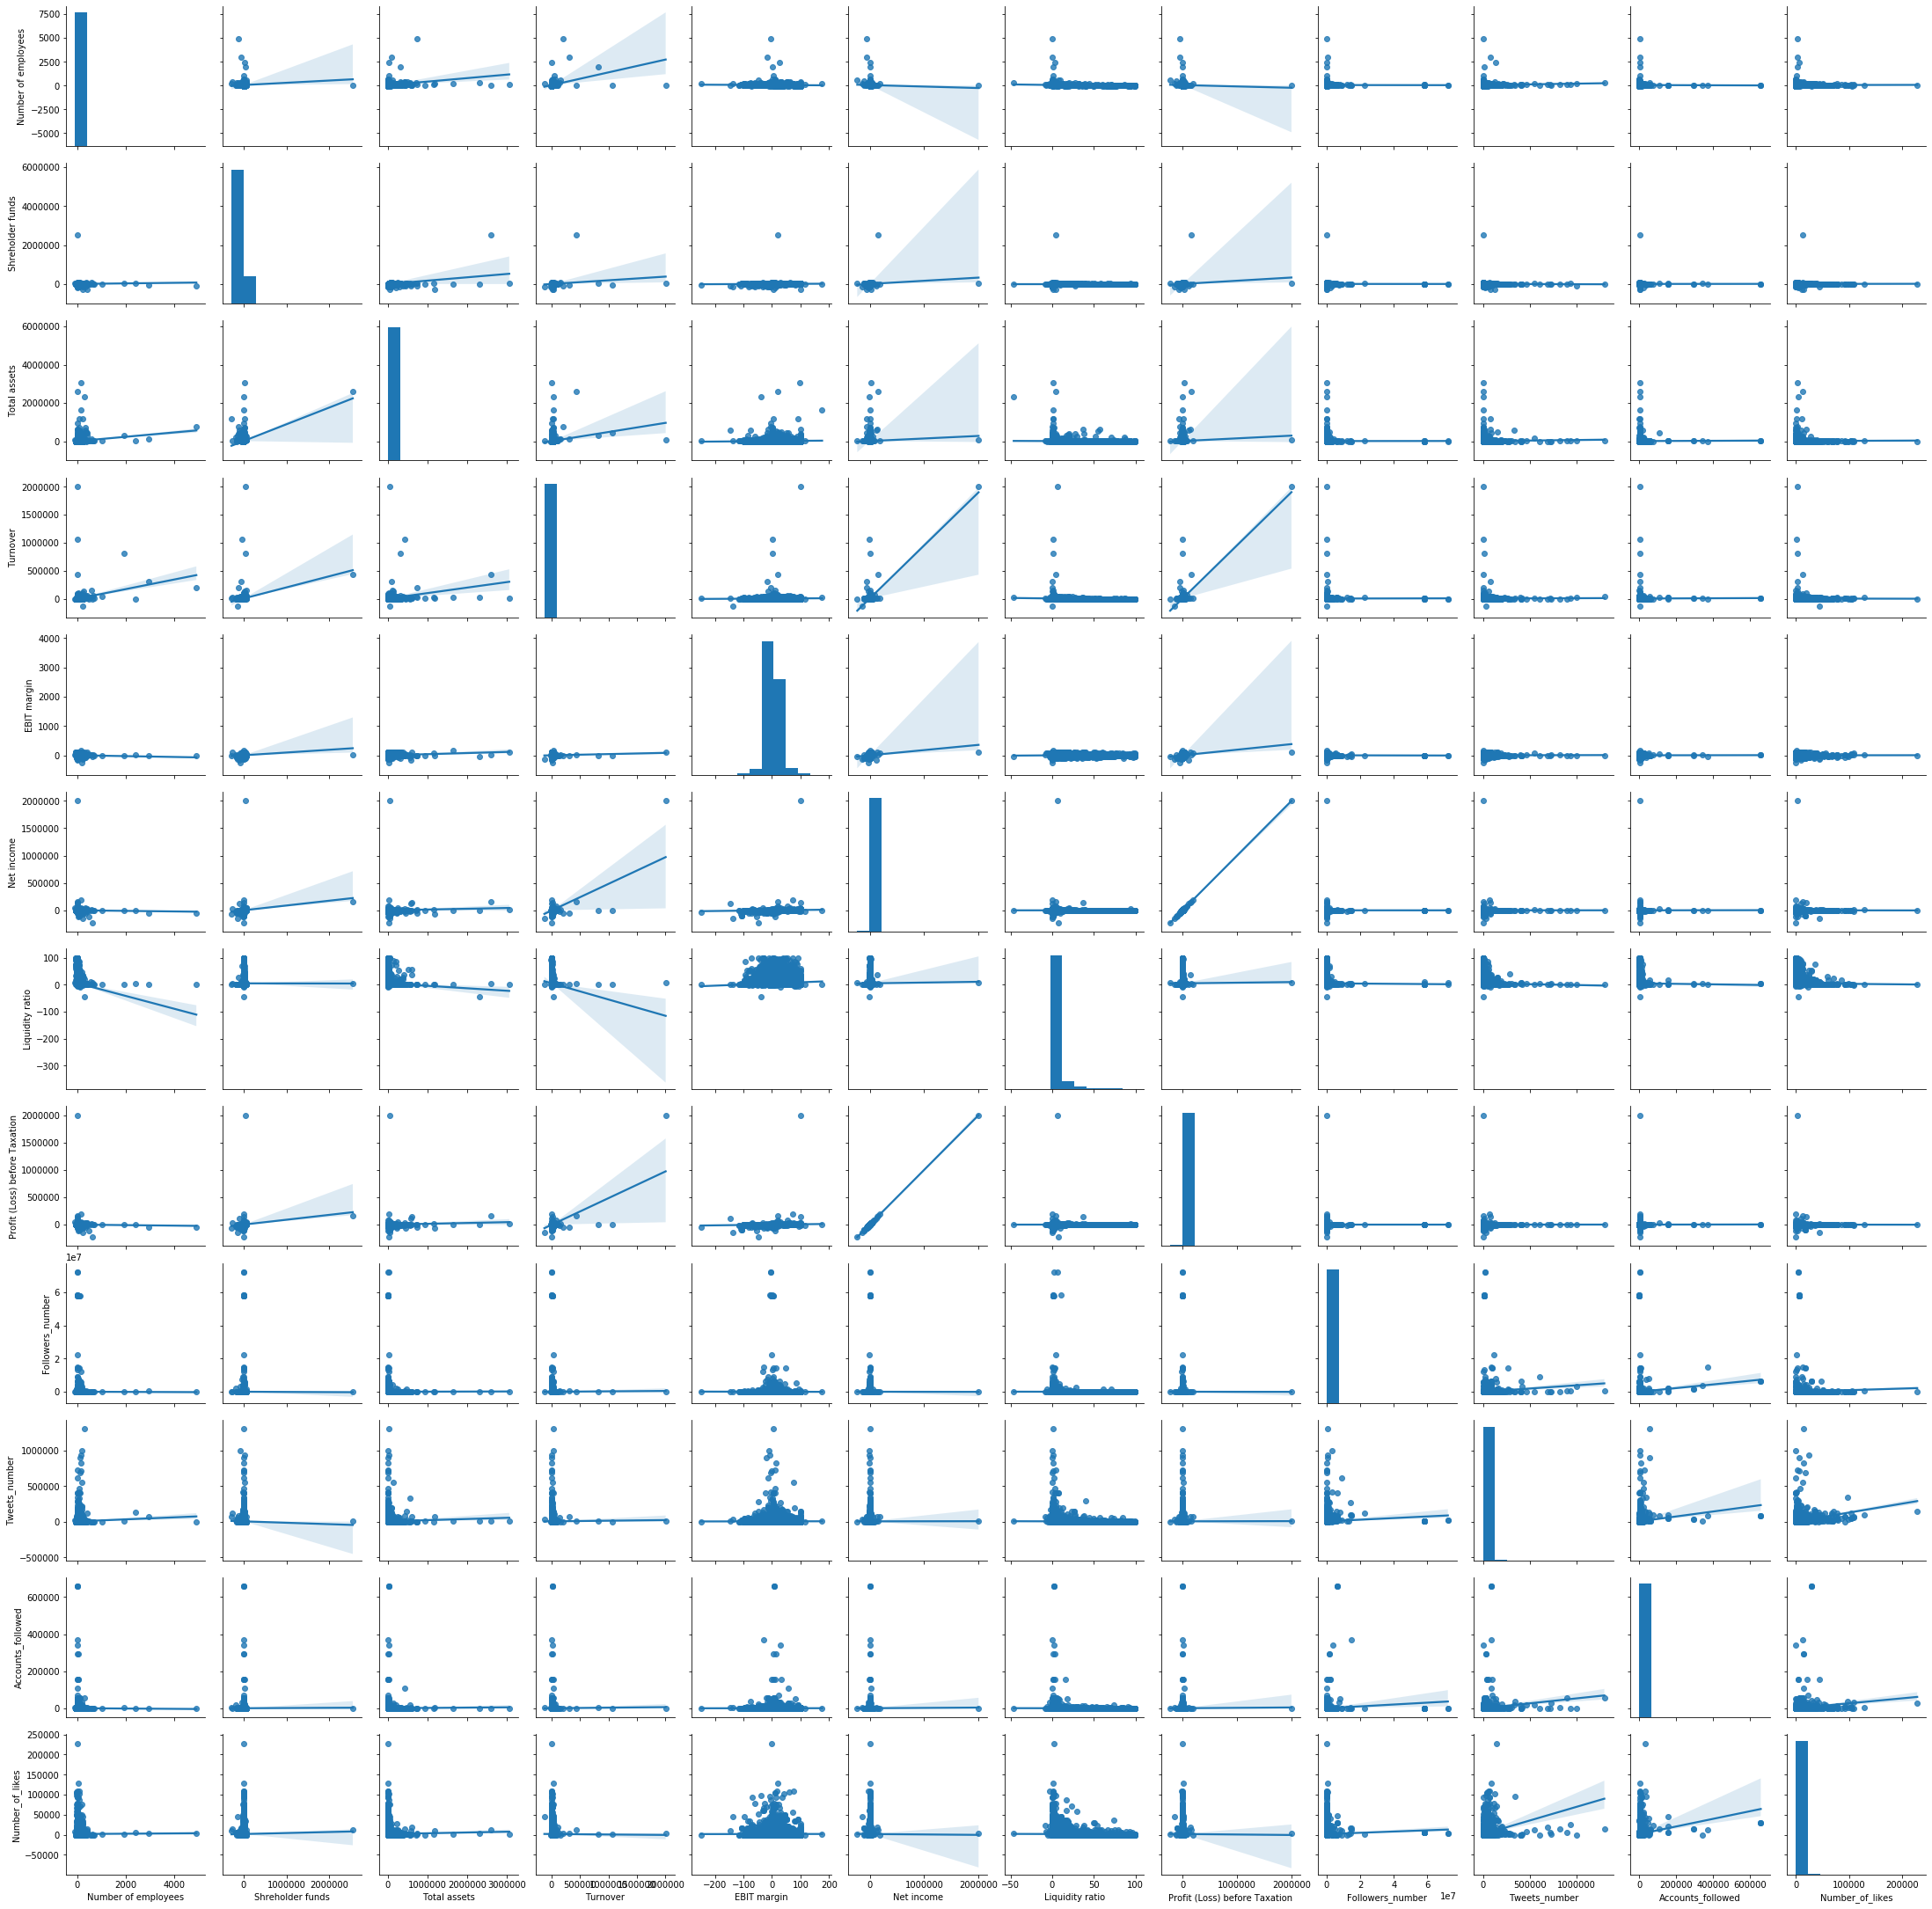

In [31]:
# sns.pairplot(df[['Number of employees',
#        'Shreholder funds', 'Total assets', 'Turnover',
#        'EBIT margin', 'Net income', 'Liquidity ratio',
#        'Profit (Loss) before Taxation', 'Followers_number', 'Tweets_number', 'Accounts_followed',
#        'Number_of_likes']],kind='reg')

In [35]:
scaled_x=RobustScaler().fit_transform(df)
df_tr = pd.DataFrame(data=scaled_x, columns=df.columns)


Apllying linear regression to establish a relationship bwteen the continuous socila media features and the financial features of interest

In [36]:
def regression(variable):
    data_const = sm.add_constant(df_tr[[ 'Number of employees',
       'Shreholder funds', 'Total assets', 'Long term liabilities', 'Turnover',
       'EBIT margin', 'Net income', 'Liquidity ratio',
       'Profit (Loss) before Taxation', 'Followers_number', 'Tweets_number', 'Accounts_followed',
       'Number_of_likes']])
    lm = sm.OLS(np.log(data_const[variable]+1),df_tr[[ 'Number of employees',
       'Shreholder funds', 'Total assets', 'Long term liabilities', 'Turnover',
       'EBIT margin', 'Net income', 'Liquidity ratio',
       'Profit (Loss) before Taxation', 'Followers_number', 'Tweets_number', 'Accounts_followed',
       'Number_of_likes']].drop(variable,axis=1)).fit()
    print(lm.summary())

In [44]:
print('######################### NUMBER OF FOLLOWERS #################################')
regression('Followers_number')
print()
print('######################### TWEETS NUMBER #######################################')
regression('Tweets_number')
print()
print('######################### ACCOUNTS FOLLOWED ###################################')
regression('Accounts_followed')
print()
print('######################### NUMBER OF LIKES #####################################')
regression('Number_of_likes')


######################### NUMBER OF FOLLOWERS #################################
                                 OLS Regression Results                                
Dep. Variable:       Followers_number   R-squared (uncentered):                   0.391
Model:                            OLS   Adj. R-squared (uncentered):              0.390
Method:                 Least Squares   F-statistic:                              1602.
Date:                Fri, 11 Sep 2020   Prob (F-statistic):                        0.00
Time:                        17:13:26   Log-Likelihood:                         -36159.
No. Observations:               30000   AIC:                                  7.234e+04
Df Residuals:                   29988   BIC:                                  7.244e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                    coef

                                 OLS Regression Results                                
Dep. Variable:        Number_of_likes   R-squared (uncentered):                   0.158
Model:                            OLS   Adj. R-squared (uncentered):              0.158
Method:                 Least Squares   F-statistic:                              469.2
Date:                Fri, 11 Sep 2020   Prob (F-statistic):                        0.00
Time:                        17:13:26   Log-Likelihood:                         -30346.
No. Observations:               30000   AIC:                                  6.072e+04
Df Residuals:                   29988   BIC:                                  6.081e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

Every social media feature is associated with at least onof the financial features of interest so it can be used in the risk prediciton model
This is indicated by a p-value lower than 0.05 lvel of singificance

LOGISTIC REGRESSION

Implementing logistic regresion to invstigate the association between the binary social media features and the financial features of interest

In [41]:
def logreg(variable):
    X=df.drop([variable,'Followers_number', 'Tweets_number', 'Accounts_followed',
       'Number_of_likes', 'Months of having a Twitter account',
       'Section C: Manufacturing', 'Section F: Construction',
       'Section G: Wholesale and Retail Trade; Repair of Motor Vehicles and Motorcycles',
       'Section H: Transportation and Storage',
       'Section J: Information and Communication'],axis=1)
    Y=df[variable]
    scaled_x=RobustScaler().fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(scaled_x, Y, test_size=0.3,random_state=0,stratify=Y)
    df_tr2 = pd.DataFrame(data=X_train, columns=X.columns)
    Xtr_test=pd.DataFrame(data=X_test, columns=X.columns)
    logreg = sm.Logit(Y,X)
    result = logreg.fit()
    prob1 = result.predict(Xtr_test)
    print(result.summary())

In [43]:
logreg('E-mail address')
logreg('Facebook')
logreg('Instagram')
logreg('LinkedIn')
print('######################### E-mail address #################################')
logreg('E-mail address')
print()
print('######################### Facebook #######################################')
logreg('Facebook')
print()
print('######################### Instagram ###################################')
logreg('Instagram')
print()
print('######################### LInkedIn #####################################')
logreg('LinkedIn')


Optimization terminated successfully.
         Current function value: 0.435209
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         E-mail address   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29986
Method:                           MLE   Df Model:                           13
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                -0.02357
Time:                        17:12:55   Log-Likelihood:                -13056.
converged:                       True   LL-Null:                       -12756.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Company status                   -0.9569      0.051    -18.794      0.

######################### E-mail address #################################
Optimization terminated successfully.
         Current function value: 0.435209
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         E-mail address   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29986
Method:                           MLE   Df Model:                           13
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                -0.02357
Time:                        17:12:57   Log-Likelihood:                -13056.
converged:                       True   LL-Null:                       -12756.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

                           Logit Regression Results                           
Dep. Variable:               LinkedIn   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29986
Method:                           MLE   Df Model:                           13
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:               0.0003729
Time:                        17:12:58   Log-Likelihood:                -11725.
converged:                       True   LL-Null:                       -11730.
Covariance Type:            nonrobust   LLR p-value:                    0.7918
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
E-mail address                   -1.0085      0.033    -30.543      0.000      -1.073      -0.944
Company status                   -0.2005      0.063     -3.176      0.001 